<a href="https://colab.research.google.com/github/D1N3SH-DEV/Data_Analysis_Challenge/blob/main/AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Air Quality Index Analysis using Python

Disclaimer: This is just a practice, some of the codes might be similar to the author, but modified some of the blocks on my level of coding for personal enhancement. You can refer to the main code from the source as well.
Source : https://thecleverprogrammer.com/2023/09/18/air-quality-index-analysis-using-python/

Now, let’s get started with the task of Air Quality Index Analysis by importing the necessary Python libraries:

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

Importing dataset:

In [64]:
file_path= 'delhiaqi.csv'
data = pd.read_csv(file_path)

Displaying the first five records using head fucntion:

In [65]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


Convert the date column in the dataset into a datetime data type

In [66]:
data['date']=pd.to_datetime(data['date'])

In [67]:
data.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


Now, let’s have a look at the descriptive statistics of the data:

In [68]:
data.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


Based on the above statistics, you can get the information about major staistical factors for each variable and carry further with the dedicated operations.

Loop through each pollutant and create a time series plot

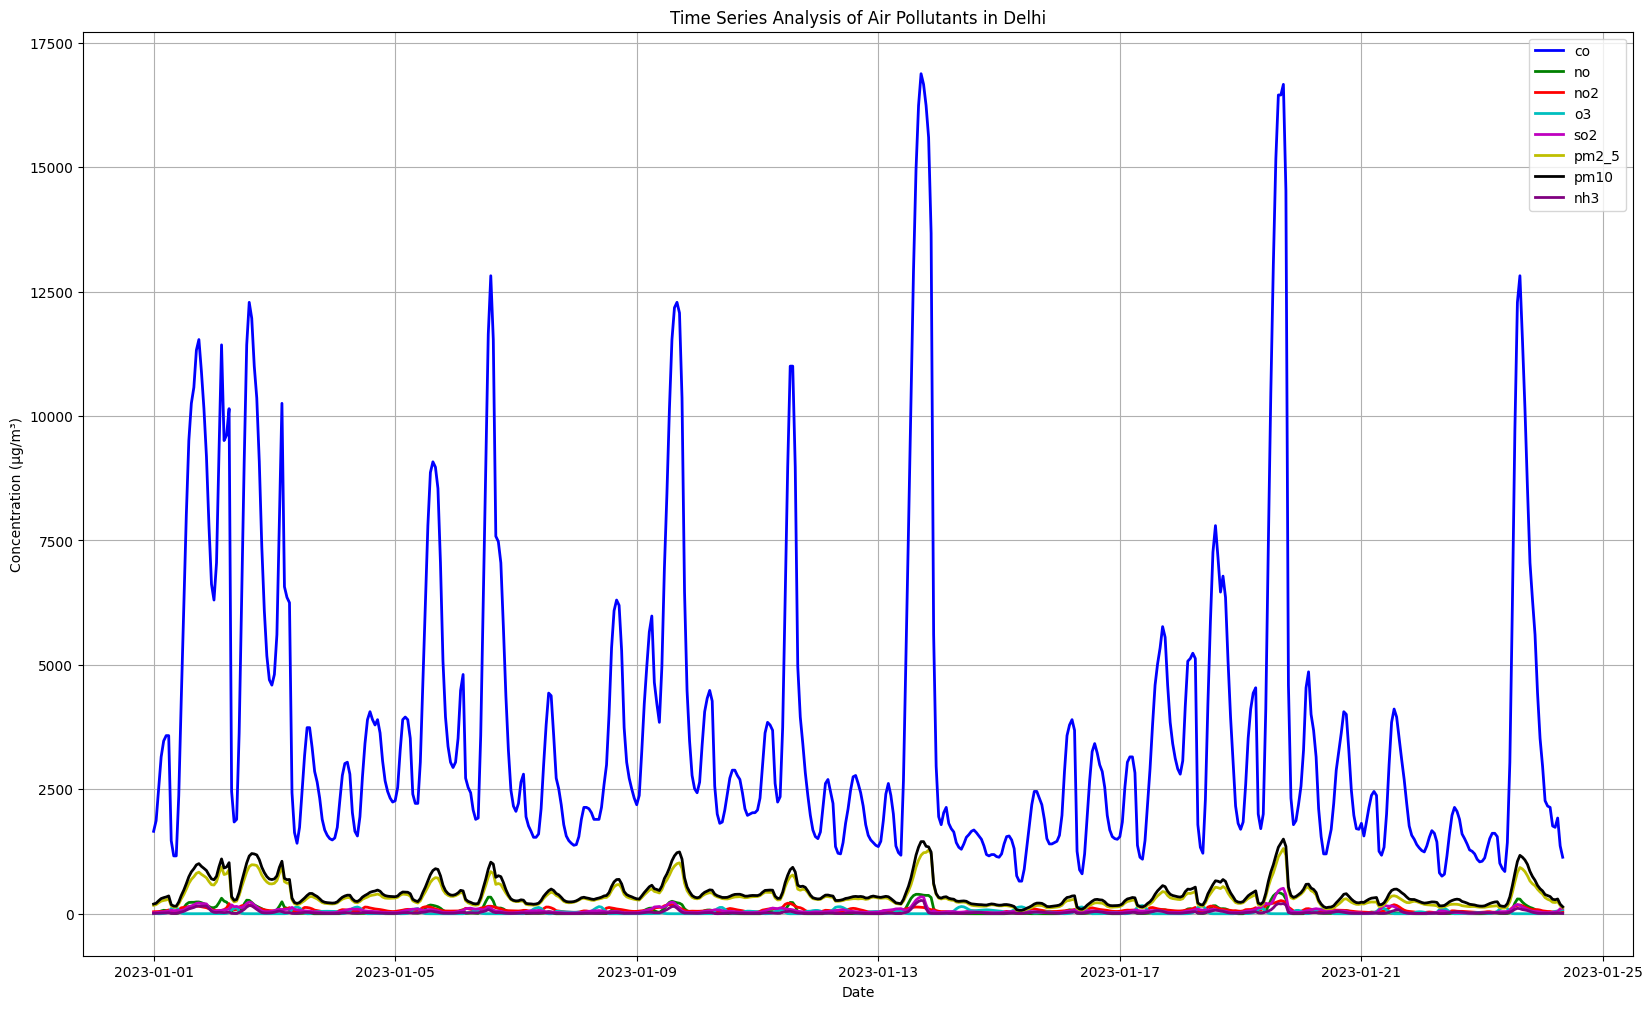

In [69]:
# Create a figure and axis for the subplots
fig, ax = plt.subplots(figsize=(20, 12))

# Loop through each pollutant and plot it with a unique color
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']
for i, pollutant in enumerate(['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']):
    ax.plot(data['date'], data[pollutant], label=pollutant, linewidth=2, color=colors[i])

ax.set_xlabel('Date')
ax.set_ylabel('Concentration (µg/m³)')
ax.set_title('Time Series Analysis of Air Pollutants in Delhi')
ax.legend()
ax.grid(True)

plt.show()


Above is the time-series analysis of air pollunats in Delhi.
This represents the intensity of air pollutants over time.

### Calculating Air Quality Index

In [70]:
# Define AQI breakpoints and corresponding AQI values
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

# Function to calculate AQI for a single pollutant
def calculate_aqi_single(concentration, breakpoints):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

# Function to calculate AQI category
def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

# Calculate AQI for each pollutant and store it in separate columns
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
for pollutant in pollutants:
    data[f'AQI_{pollutant}'] = data[pollutant].apply(lambda x: calculate_aqi_single(x, aqi_breakpoints))

# Calculate overall AQI
data['AQI'] = data[[f'AQI_{pollutant}' for pollutant in pollutants]].max(axis=1)

# Categorize AQI
data['AQI Category'] = data['AQI'].apply(categorize_aqi)

print(data.head())


                 date       co     no    no2    o3    so2   pm2_5    pm10  \
0 2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1 2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2 2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3 2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4 2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3 AQI_co  AQI_no  AQI_no2  AQI_o3  AQI_so2  AQI_pm2_5  AQI_pm10  \
0   5.83   None    50.0      150    50.0    100.0      300.0     300.0   
1   7.66   None    50.0      150    50.0    100.0      300.0     300.0   
2  11.40   None   100.0      150    50.0    100.0      300.0     400.0   
3  13.55   None     NaN      150    50.0    150.0      400.0     400.0   
4  14.19   None   200.0      150    50.0    150.0      400.0     400.0   

   AQI_nh3    AQI    AQI Category  
0     50.0  300.0  Very Unhealthy  
1     50.0  300.0  V

The provided code calculates the Air Quality Index (AQI) and its corresponding category for various air pollutants using a predefined set of AQI breakpoints and categories. Here's a summary of the code:

1. AQI Breakpoints and Categories Definition:

- AQI breakpoints and corresponding AQI values are defined for various pollutant concentration ranges.
- AQI categories are defined to describe the air quality levels corresponding to AQI values.

2. Calculation Functions:

The code defines two functions:
* calculate_aqi_single(concentration, breakpoints): Calculates the AQI for a single pollutant based on its concentration and the provided AQI breakpoints.
* categorize_aqi(aqi_value): Categorizes the calculated AQI value into an AQI category based on predefined ranges.

3. Calculation and Categorization:

- The code iterates through a list of pollutants (e.g., 'co', 'no', 'no2') and calculates the AQI for each pollutant, storing the results in separate columns (e.g., 'AQI_co', 'AQI_no', etc.).
- The overall AQI is determined by taking the maximum AQI value among all pollutants for each row, and the result is stored in a new column 'AQI'.
- The code then categorizes the AQI values into AQI categories and stores the category in a 'AQI Category' column.

This code simplifies the calculation and categorization of AQI for multiple pollutants by using functions and DataFrame operations, resulting in a more organized and efficient implementation.

In [71]:
# AQI over time
fig = px.bar(data, x="date", y="AQI",
             title="AQI of Delhi in January")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="AQI")
fig.show()

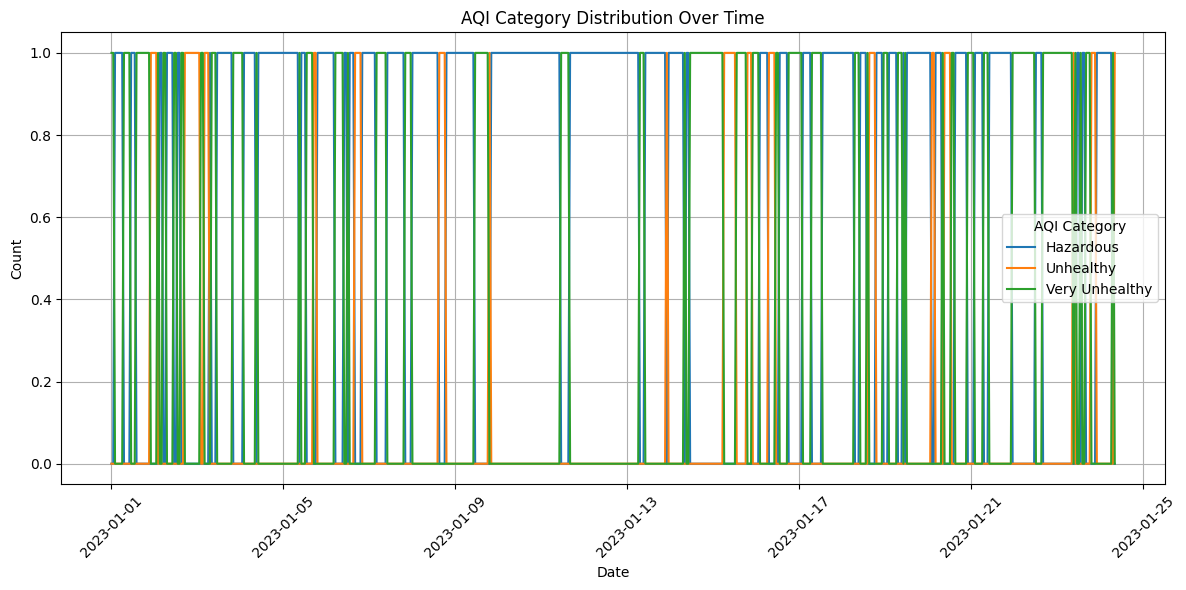

In [72]:
# Group the data by date and AQI Category and count the occurrences
category_distribution = data.groupby(['date', 'AQI Category']).size().unstack(fill_value=0)

# Create a histogram for AQI Category distribution over time
plt.figure(figsize=(12, 6))

# Plot each category with a different color
for category in category_distribution.columns:
    plt.plot(category_distribution.index, category_distribution[category], label=category)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('AQI Category Distribution Over Time')

# Add a legend to differentiate the AQI categories
plt.legend(title="AQI Category")

# Show the histogram
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Distribution of pollutants in the air quality of Delhi

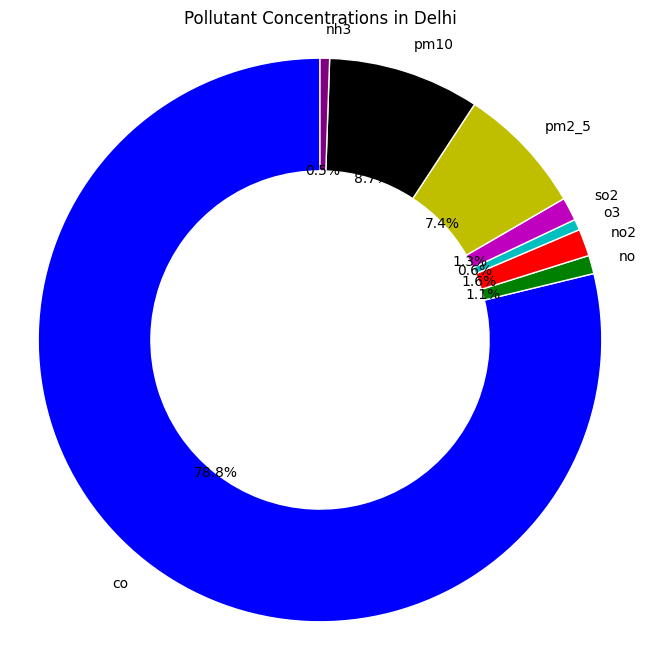

In [73]:
# Define pollutant colors
pollutant_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']  # Define custom colors

# Calculate the sum of pollutant concentrations
total_concentrations = data[pollutants].sum()

# Create a donut chart for pollutant concentrations
plt.figure(figsize=(8, 8))
plt.pie(total_concentrations, labels=pollutants, autopct='%1.1f%%', colors=pollutant_colors,
        startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

# Add a title
plt.title("Pollutant Concentrations in Delhi")

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Show the donut chart
plt.show()

Showing the correlation between pollutants.

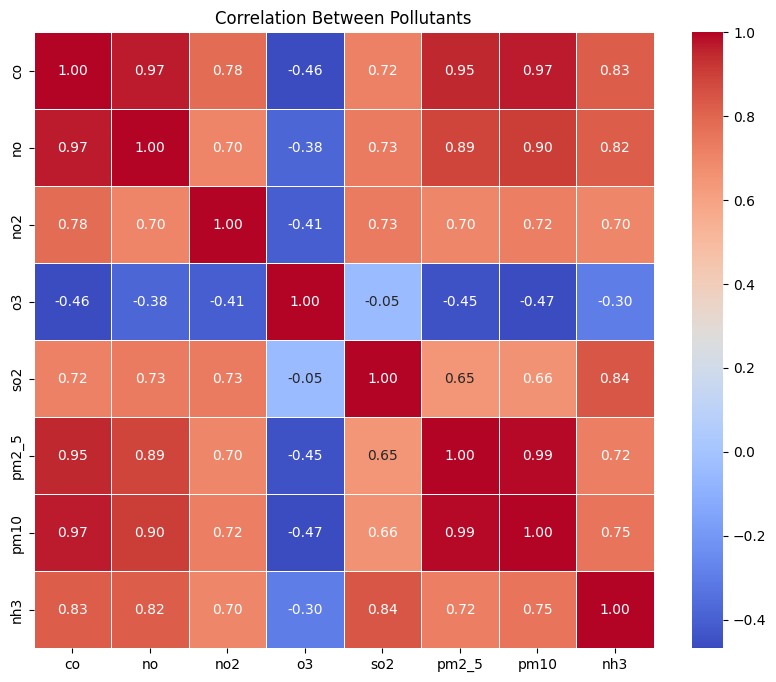

In [74]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = data[pollutants].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Between Pollutants")

# Show the heatmap
plt.show()

The correlation matrix displayed here represents the correlation coefficients between different air pollutants in the dataset. Correlation coefficients measure the strength and direction of the linear relationship between two variables, with values ranging from -1 to 1. Overall, the positive correlations among CO, NO, NO2, SO2, PM2.5, PM10, and NH3 suggest that they may share common sources or have similar pollution patterns, while O3 exhibits an inverse relationship with the other pollutants, which may be due to its role as both a pollutant and a natural atmospheric oxidant.

Hourly average trends of AQI in Delhi:

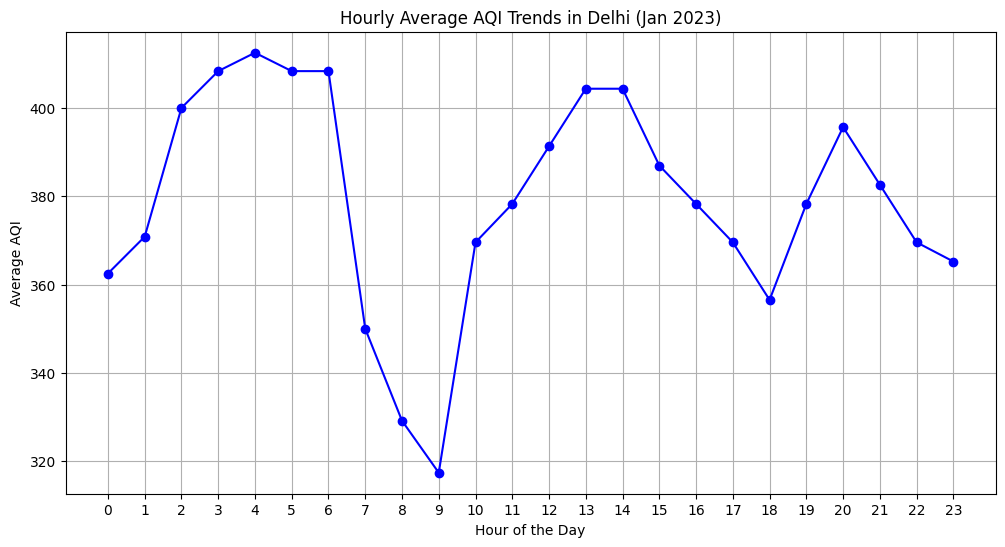

In [75]:
# Calculate hourly average AQI
data['Hour'] = pd.to_datetime(data['date']).dt.hour
hourly_avg_aqi = data.groupby('Hour')['AQI'].mean().reset_index()

# Create a line plot for hourly trends in AQI
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg_aqi['Hour'], hourly_avg_aqi['AQI'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Average AQI')
plt.title('Hourly Average AQI Trends in Delhi (Jan 2023)')

# Set x-axis ticks for every hour (0 to 23)
plt.xticks(range(24))

# Show the line plot
plt.grid(True)
plt.show()


Average AQI by day of the week in Delhi

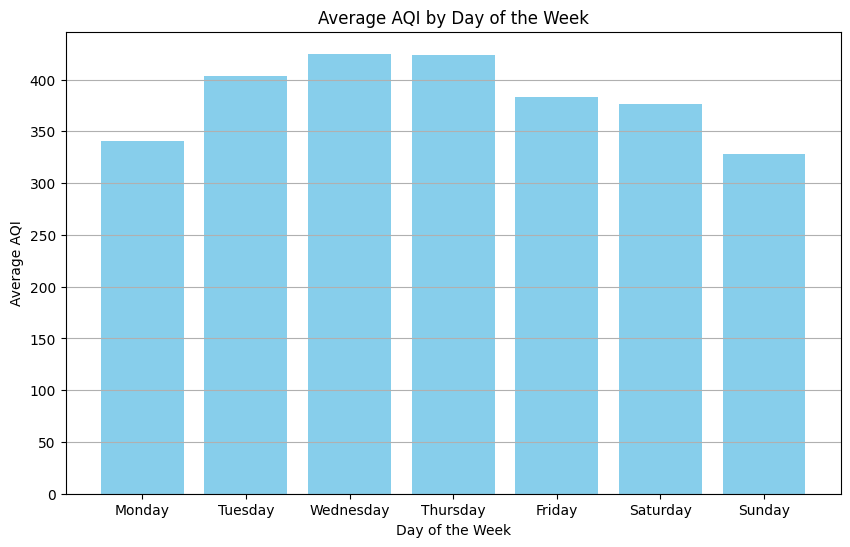

In [76]:
# Calculate average AQI by day of the week
data['Day_of_Week'] = data['date'].dt.day_name()
average_aqi_by_day = data.groupby('Day_of_Week')['AQI'].mean()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_aqi_by_day = average_aqi_by_day.reindex(days_of_week)

# Create a bar plot for average AQI by day of the week
plt.figure(figsize=(10, 6))
plt.bar(average_aqi_by_day.index, average_aqi_by_day, color='skyblue')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Average AQI')
plt.title('Average AQI by Day of the Week')

# Show the bar plot
plt.grid(axis='y')
plt.show()